## Recommender System - A Simple Example

This example utilizes a dataset of movie ratings by user. We'll attempt to recommend other movies a user might like based upon the first. We have 'u.data' and 'Movie_ID_Titles' files to read in.

In [ ]:
#Initial Imports
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### Data Imports

In [81]:
#Set column names
column_names = ['user_id','item_id','rating','timestamp']

#Read in data
df = pd.read_csv('u.data',sep='\t',names=column_names)

In [82]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [83]:
#Read in data
movie_titles = pd.read_csv('Movie_Id_Titles')

In [84]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [85]:
#Merge these two datasets on the item id
df = pd.merge(df,movie_titles,on='item_id')

In [86]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### Data Manipulation

First we want to create a ratings dataframe to hold the average rating for every movie title.

Then we want to add the number of users that rated each movie onto that dataset. This is important because we may end up with outliers in which a movie only received 1-2 ratings and will skew results.

In [88]:
#Create base ratings dataframe with avg. rating by title
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [89]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [90]:
#Tack on a new column called 'num of ratings' to hold the num of users who rated that movie
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [91]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


### Light Visual Exploration

We can visualize the number of ratings and the rating given to help determine outliers. Here we can see that a small amount of movies contain the most ratings (one could surmise that a small amount of popular movies are more likely to be rated). Also - we can see that there are a disproportionate amount of 1.0 ratings (one could surmise this that this is because highly unpopular movies are more likely to be rated as a 1.0, or that these could be movies that are less likely to be heard of)

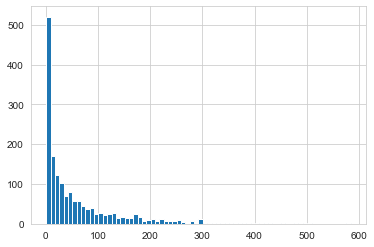

In [40]:
sns.set_style('whitegrid')
ratings['num of ratings'].hist(bins=70)

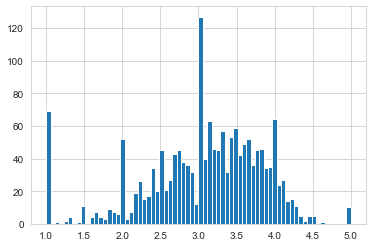

In [41]:
ratings['rating'].hist(bins=70)

Notice while utilizing a jointplot that the number of ratings seem to correlate to higher ratings - again this could mean that more popular movies are more likely to receive both higher ratings as well as an increased volume of ratings.

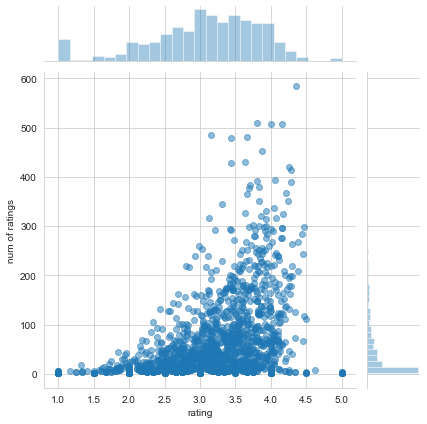

In [43]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

### Data Manipulation Pt. 2

Now that we have a dataframe to hold the number of ratings per movie, we'll want to pivot the data to more easily obtain individual ratings for specific movies. In this example we're going to test out the correlation of all movies against Star Wars and Liar Liar.

In [97]:
#Create pivoted dataframe to show user ratings by movie titles
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

In [98]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
#Grab the ratings for Star Wars and Liar Liar individually
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [48]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

### Correlate - Star Wars

We can now use the corrwith function to take the original pivoted dataframe (moviemat), and throw back all movies that are similar (1 meaning perfectly correlated)

In [145]:
#Find all movies similar to Star Wars
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [146]:
#Build correlation dataframe for Star Wars
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

#Drop out NaN
corr_starwars.dropna(inplace=True)

In [147]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [148]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


So what is the problem here? We're receiving perfect correlations for a large amount of moviees. The most likely issue we're facing is that these movies probably have only a few number of users who have rated them, and those users just so happened to rate Star Wars as well. Meaning these are outliers due to the low number of users who have rated them. We could of course verify this by pulling the number of ratings for these 10.

In [149]:
#Pull number of ratings for these titles
tempDF = corr_starwars.sort_values('Correlation',ascending=False).head(10)
pd.merge(ratings,tempDF,on='title')

,rating,num of ratings,Correlation
title,,,
"Beans of Egypt, Maine, The (1994)",3.500000,2,1.0
Commandments (1997),2.666667,3,1.0
Cosi (1996),4.000000,4,1.0
"Good Man in Africa, A (1994)",3.000000,2,1.0
Hollow Reed (1996),2.333333,6,1.0
Man of the Year (1995),3.111111,9,1.0
No Escape (1994),2.400000,5,1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",2.600000,5,1.0
"Outlaw, The (1943)",2.500000,2,1.0


In [150]:
#Pull mean of num of ratings
ratings['num of ratings'].mean()

60.09795673076923

Based on the fact that the mean number of ratings is ~60, we could likely conclude these are just outliers that could be removed to help improve accuracy. To complete out correlation, we can bring in the num of ratings for all movies into our dataframe and filter these out.

In [151]:
#Join in the ratings for all movies
corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [152]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [153]:
#Sort out anything that falls below the mean of 60 ratings
corr_starwars[corr_starwars['num of ratings'] > 60].sort_values('Correlation',ascending=False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
Midnight in the Garden of Good and Evil (1997),-0.207440,80
Jack (1996),-0.217553,70
McHale's Navy (1997),-0.239763,69


This data seems to make a lot of sense as the sequels to star wars are being correlated highly.

### Correlate - Liar Liar

Now we can repeat the same process for the next movie...

In [155]:
#Find all movies similar to Liar Liar
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [156]:
#Build correlation dataframe
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])

#Drop NaN
corr_liarliar.dropna(inplace=True)

In [157]:
#Join in the num of ratings
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])

In [158]:
#Show final correlation
corr_liarliar[corr_liarliar['num of ratings'] > 100].sort_values('Correlation',ascending=False)

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194


Given the final results here, I'd have to say this also makes a lot of sense. The movies being shown were all quite popular all around the same general timeframe.